In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
tokenizer = info.features['text'].encoder

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLOPHYC/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLOPHYC/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLOPHYC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 111s 256ms/step - loss: 0.5998 - accuracy: 0.6510 - val_loss: 0.6351 - val_accuracy: 0.6474
Epoch 2/10
391/391 [==============================] - 100s 254ms/step - loss: 0.4430 - accuracy: 0.8061 - val_loss: 0.5892 - val_accuracy: 0.6640
Epoch 3/10
391/391 [==============================] - 101s 257ms/step - loss: 0.3548 - accuracy: 0.8491 - val_loss: 0.4076 - val_accuracy: 0.8284
Epoch 4/10
391/391 [==============================] - 101s 258ms/step - loss: 0.2577 - accuracy: 0.8997 - val_loss: 0.4002 - val_accuracy: 0.8286
Epoch 5/10
391/391 [==============================] - 101s 258ms/step - loss: 0.3361 - accuracy: 0.8473 - val_loss: 0.4642 - val_accuracy: 0.8046
Epoch 6/10
391/391 [==============================] - 101s 258ms/step - loss: 0.2777 - accuracy: 0.8928 - val_loss: 0.3817 - val_accuracy: 0.8472
Epoch 7/10
391/391 [==============================] - 101s 258ms/step - loss: 0.1971 - accuracy: 0.9305 - val_loss: 0.4270 -

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

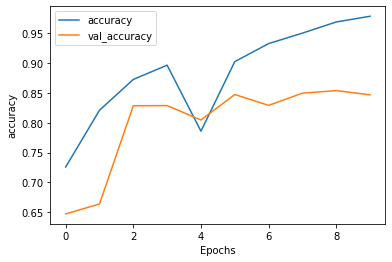

In [7]:
plot_graphs(history, 'accuracy')

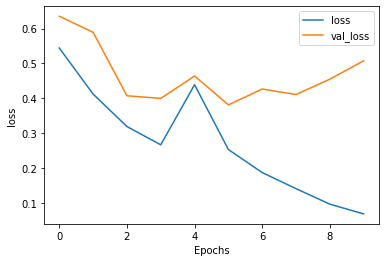

In [8]:
plot_graphs(history, 'loss')